#### Imports

In [1]:
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt

#### Read in RSA moduli (316 in all)

#### Certificates downloaded from: https://github.com/radii/observatory

In [2]:
df=pd.read_csv('pub_keys_moduli.txt')
df.columns=['N']
df

,N
0,BAF0E4CFF9C4AE8554B90757F98FC57F6811F8C417B044...
1,FD77AAA51C90053BCB4C9B338B5A1445A4E79016D1DF57...
2,94900C4B71291CDAF668797AA4BAE7D2CC8DAFE8479099...
3,A75BB10D8A5321BA52883890426544FD56EB73C585F306...
4,A728B4D83CF5BF7A0691BDA5424CB37C9E886699C5DB17...
...,...
311,B3B3FE7FD36DB1EF167C57A50C6D768A2F4BBF64FB4CEE...
312,BC7FEC579B24E0FE9CBA4279A9888AFA80E0F5072943EA...
313,ABA481E595CDF5F6148EC24FCAD4E27895589C41E10D99...
314,995E1E8096662364CE9C8C003E0AAF08E9B804E084B86D...


### Convert moduli to list

In [3]:
moduli=list(df['N'])
print(len(moduli))

316


### Check GCD among pairs of moduli

### (common factors mean we can break the key)

In [4]:
from math import gcd
for N1 in moduli:
    for N2 in moduli:
        gcd_val=gcd(int(N1,16),int(N2,16))
        if gcd_val != 1 and N1!=N2:
            print(N1,N2)

### Bummer, no common factors

### See if the distribution of bytes in the moduli is uniform

In [5]:
# convert RSA modulus to a hex string
hex_N=''
for N in moduli:
    hex_N+=N
#characters in the alphabet are chars ths\at make up hex strings
chars=set('abcdef0123456789')

# get dict of counts of all bytes (length-2 strings)
counts = Counter( a+b for a,b in zip(hex_N,hex_N[1:]) if a in chars and b in chars)
print(counts)


Counter({'83': 718, '50': 699, '06': 699, '78': 695, '61': 692, '66': 687, '80': 687, '41': 685, '72': 685, '68': 683, '57': 680, '87': 680, '88': 680, '95': 679, '77': 678, '86': 677, '48': 673, '71': 673, '38': 673, '79': 673, '60': 671, '94': 670, '76': 670, '37': 669, '90': 668, '56': 665, '22': 664, '08': 664, '74': 664, '19': 663, '84': 662, '63': 661, '25': 661, '59': 660, '03': 660, '35': 660, '16': 658, '45': 658, '85': 657, '58': 657, '43': 657, '98': 655, '26': 655, '40': 653, '07': 652, '05': 652, '33': 650, '30': 650, '99': 650, '52': 648, '24': 648, '09': 648, '92': 648, '54': 647, '46': 647, '00': 647, '10': 647, '15': 647, '47': 647, '17': 645, '01': 642, '55': 640, '44': 639, '62': 639, '97': 639, '13': 639, '93': 639, '70': 638, '82': 638, '28': 637, '04': 636, '29': 636, '91': 635, '23': 633, '53': 633, '42': 633, '89': 631, '64': 631, '39': 630, '20': 630, '31': 629, '36': 629, '32': 629, '67': 627, '14': 622, '96': 622, '81': 618, '11': 617, '51': 617, '69': 617, '

<BarContainer object of 100 artists>

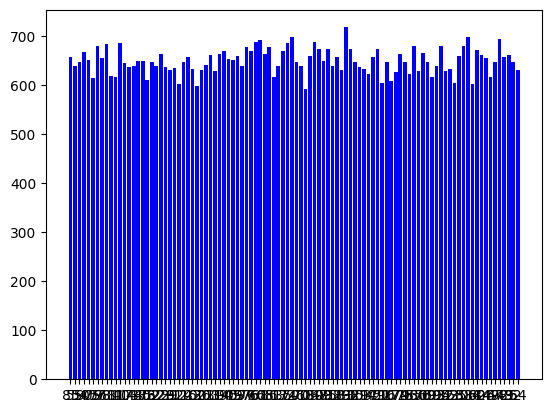

In [6]:
# plot byte counts
idth=1.0
plt.bar(list(counts.keys()), counts.values(), color='b')

### Pretty noisy, but farly uniform distribution